In [143]:
import pandas as pd
from sklearn.cluster import KMeans
from kneed import KneeLocator
from openpyxl import load_workbook
import matplotlib.pyplot as plt

In [144]:
ruta_archivo = 'C:/Users/carlos.ramirezc/Downloads/Libro13.xlsx'
nombre_pestaña = 'Resultado'
canasta =pd.read_excel(ruta_archivo, sheet_name=nombre_pestaña)
canasta

,País,a.Reg,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH
0,Albania,1,4554.826291,1.761020,NaN,NaN,2.2280,0.951300,6.546046,32.95,0.791
1,Alemania,1,45723.137967,1.176227,4183.05,14.2995,1.4495,1.025332,11.278423,31.55,0.939
2,Argentina,0,12562.520359,NaN,7381.70,NaN,2.6575,1.032921,9.585198,41.60,0.830
3,Australia,1,55825.939952,1.761084,3634.10,12.5350,1.6955,0.982445,10.107973,34.30,0.938
4,Austria,1,48749.780902,1.568354,3821.15,12.0250,1.9795,1.015564,10.367779,30.50,0.914
5,Bélgica,1,45418.581848,1.705336,4173.40,11.8200,1.9815,0.972709,10.757148,27.50,0.919
6,Brasil,1,8983.171260,5.031008,8991.00,18.2160,2.3335,1.032393,9.316882,53.30,0.761
7,Bulgaria,1,8134.039549,0.978481,8192.05,35.6785,3.1170,0.998481,7.423914,40.35,0.816
8,Canadá,1,45729.050569,1.751760,4196.80,16.5580,1.6475,0.987462,10.853966,33.20,0.922
9,Chile,0,14649.145205,3.171869,5175.50,13.9610,2.9900,1.042821,8.793604,44.40,0.847


In [145]:
#Dropear nan*
canasta=canasta.dropna()
canasta

,País,a.Reg,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH
1,Alemania,1,45723.137967,1.176227,4183.05,14.2995,1.4495,1.025332,11.278423,31.55,0.939
3,Australia,1,55825.939952,1.761084,3634.10,12.5350,1.6955,0.982445,10.107973,34.30,0.938
4,Austria,1,48749.780902,1.568354,3821.15,12.0250,1.9795,1.015564,10.367779,30.50,0.914
5,Bélgica,1,45418.581848,1.705336,4173.40,11.8200,1.9815,0.972709,10.757148,27.50,0.919
6,Brasil,1,8983.171260,5.031008,8991.00,18.2160,2.3335,1.032393,9.316882,53.30,0.761
7,Bulgaria,1,8134.039549,0.978481,8192.05,35.6785,3.1170,0.998481,7.423914,40.35,0.816
8,Canadá,1,45729.050569,1.751760,4196.80,16.5580,1.6475,0.987462,10.853966,33.20,0.922
9,Chile,0,14649.145205,3.171869,5175.50,13.9610,2.9900,1.042821,8.793604,44.40,0.847
12,Colombia,1,6444.189884,3.918666,6352.95,15.5565,1.1645,1.024279,7.578292,50.80,0.761
13,Corea del Sur,0,30452.856920,1.123230,3415.15,20.5555,2.2940,0.977916,7.010638,31.30,0.906


In [146]:
#2019 como variable para clusterizar. Traer los paises para saber a que cluster pertenecen
X=canasta[['1.PIB pp','2.Infl','3.PYLL','4.ph_H','5.OOP','6.IPm','7.S/PIB','8.Ind. Gini','9.IDH']]

In [147]:
X

,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH
1,45723.137967,1.176227,4183.05,14.2995,1.4495,1.025332,11.278423,31.55,0.939
3,55825.939952,1.761084,3634.10,12.5350,1.6955,0.982445,10.107973,34.30,0.938
4,48749.780902,1.568354,3821.15,12.0250,1.9795,1.015564,10.367779,30.50,0.914
5,45418.581848,1.705336,4173.40,11.8200,1.9815,0.972709,10.757148,27.50,0.919
6,8983.171260,5.031008,8991.00,18.2160,2.3335,1.032393,9.316882,53.30,0.761
7,8134.039549,0.978481,8192.05,35.6785,3.1170,0.998481,7.423914,40.35,0.816
8,45729.050569,1.751760,4196.80,16.5580,1.6475,0.987462,10.853966,33.20,0.922
9,14649.145205,3.171869,5175.50,13.9610,2.9900,1.042821,8.793604,44.40,0.847
12,6444.189884,3.918666,6352.95,15.5565,1.1645,1.024279,7.578292,50.80,0.761
13,30452.856920,1.123230,3415.15,20.5555,2.2940,0.977916,7.010638,31.30,0.906


In [148]:
#Claudio

data = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    data.append(kmeans.inertia_)

c:\Users\carlos.ramirezc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carlos.ramirezc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carlos.ramirezc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\carlos.ramirezc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change 

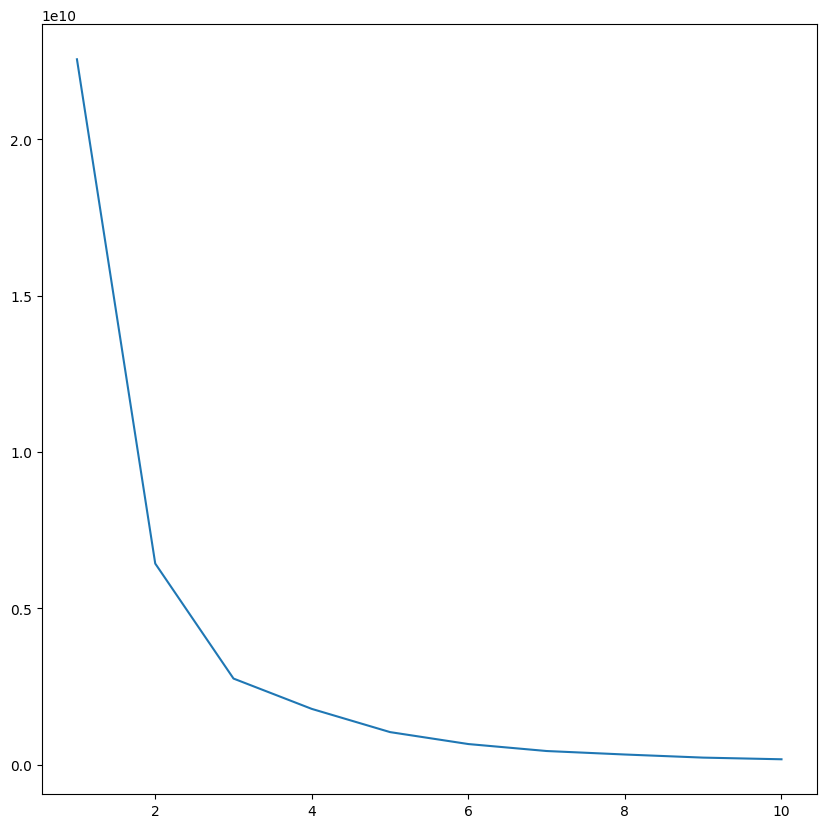

In [149]:
plt.plot(range(1, 11), data)

In [150]:
#Ubicación del codo
kl=KneeLocator(range(1, 11), data, curve="convex", direction="decreasing")
kl.elbow

3

In [151]:
#Traer los clusters a la base de datos
kmeans = KMeans(n_clusters=kl.elbow, random_state=0)
kmeans.fit(X)
canasta['cluster']=kmeans.labels_

c:\Users\carlos.ramirezc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\carlos.ramirezc\AppData\Local\Temp\ipykernel_17860\2239669013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canasta['cluster']=kmeans.labels_


In [152]:
canasta

,País,a.Reg,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH,cluster
1,Alemania,1,45723.137967,1.176227,4183.05,14.2995,1.4495,1.025332,11.278423,31.55,0.939,1
3,Australia,1,55825.939952,1.761084,3634.10,12.5350,1.6955,0.982445,10.107973,34.30,0.938,1
4,Austria,1,48749.780902,1.568354,3821.15,12.0250,1.9795,1.015564,10.367779,30.50,0.914,1
5,Bélgica,1,45418.581848,1.705336,4173.40,11.8200,1.9815,0.972709,10.757148,27.50,0.919,1
6,Brasil,1,8983.171260,5.031008,8991.00,18.2160,2.3335,1.032393,9.316882,53.30,0.761,0
7,Bulgaria,1,8134.039549,0.978481,8192.05,35.6785,3.1170,0.998481,7.423914,40.35,0.816,0
8,Canadá,1,45729.050569,1.751760,4196.80,16.5580,1.6475,0.987462,10.853966,33.20,0.922,1
9,Chile,0,14649.145205,3.171869,5175.50,13.9610,2.9900,1.042821,8.793604,44.40,0.847,0
12,Colombia,1,6444.189884,3.918666,6352.95,15.5565,1.1645,1.024279,7.578292,50.80,0.761,0
13,Corea del Sur,0,30452.856920,1.123230,3415.15,20.5555,2.2940,0.977916,7.010638,31.30,0.906,0


In [153]:
# # #Imprimir países por cluster como lista con espacios
for i in range(0,kl.elbow):
    print('Cluster',i)
    print(list(canasta[canasta['cluster']==i]['País']))
    print('')

Cluster 0
['Brasil', 'Bulgaria', 'Chile', 'Colombia', 'Corea del Sur', 'Costa Rica', 'Croacia', 'Eslovaquia', 'Eslovenia', 'España', 'Estonia', 'Grecia', 'Hungría', 'Italia', 'Letonia', 'Lituania', 'México', 'Polonia', 'Portugal', 'República Checa', 'Rumanía']

Cluster 1
['Alemania', 'Australia', 'Austria', 'Bélgica', 'Canadá', 'Dinamarca', 'Estados Unidos', 'Finlandia', 'Francia', 'Irlanda', 'Islandia', 'Países Bajos', 'Reino Unido', 'Suecia']

Cluster 2
['Luxemburgo', 'Noruega', 'Suiza']



In [154]:
# contar los paises por cluster
canasta['cluster'].value_counts()

0    21
1    14
2     3
Name: cluster, dtype: int64

In [156]:
# filtrar por cluster 0 y a.Reg=1
len(canasta[(canasta['cluster']==1) & (canasta['a.Reg']==1)])

12

In [159]:
cfinal=canasta[(canasta['cluster']==0) & (canasta['a.Reg']==1)]
cfinal

,País,a.Reg,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH,cluster
6,Brasil,1,8983.171260,5.031008,8991.00,18.2160,2.3335,1.032393,9.316882,53.30,0.761,0
7,Bulgaria,1,8134.039549,0.978481,8192.05,35.6785,3.1170,0.998481,7.423914,40.35,0.816,0
12,Colombia,1,6444.189884,3.918666,6352.95,15.5565,1.1645,1.024279,7.578292,50.80,0.761,0
14,Costa Rica,1,12008.973337,1.860977,5629.05,11.5070,1.6225,1.057519,7.301560,48.35,0.794,0
15,Croacia,1,13720.147148,0.278312,5449.50,21.3310,0.7430,1.017792,6.719618,30.65,0.837,0
17,Eslovaquia,1,18152.592572,0.617890,6376.20,26.4920,1.2675,1.020032,6.845047,25.10,0.857,0
18,Eslovenia,1,23880.599389,0.814226,4070.25,18.2610,1.0125,0.992065,8.480639,24.70,0.902,0
19,España,1,28849.486274,0.274202,3342.30,15.3420,1.9965,0.998286,9.045191,35.25,0.893,0
21,Estonia,1,20349.416054,1.212972,6461.70,17.5465,1.6120,0.964529,6.671880,31.00,0.882,0
24,Grecia,1,18863.186864,-0.286323,4149.45,28.0975,2.9145,0.999067,8.168891,34.70,0.872,0


In [160]:
cfinal.describe()

,a.Reg,1.PIB pp,2.Infl,3.PYLL,4.ph_H,5.OOP,6.IPm,7.S/PIB,8.Ind. Gini,9.IDH,cluster
count,18.0,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.00000,18.0
mean,1.0,16986.659250,1.322043,6170.352778,21.604278,1.805333,1.004892,7.439582,35.461111,0.84750,0.0
std,0.0,7053.193532,1.287494,1923.346595,6.413790,0.702907,0.025759,1.196177,8.283693,0.04278,0.0
min,1.0,6444.189884,-0.286323,3222.950000,11.507000,0.743000,0.960786,5.086258,24.700000,0.76100,0.0
25%,1.0,12436.766790,0.565223,4387.437500,17.301625,1.190250,0.993620,6.683814,30.662500,0.82125,0.0
50%,1.0,16218.483022,1.091074,6364.575000,19.574750,1.741500,1.004595,7.362737,34.750000,0.85550,0.0
75%,1.0,20327.952022,1.537229,7944.037500,27.013250,2.272125,1.019585,8.402702,36.975000,0.87950,0.0
max,1.0,33040.235639,5.031008,8991.000000,35.678500,3.117000,1.057519,9.368638,53.300000,0.90200,0.0
